### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = [tienda, tienda2, tienda3, tienda4]
tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
total_general = 0

for i, df in enumerate(tiendas, start=1):
    # Suma de la columna 'Precio' en la tienda i
    total_tienda = df['Precio'].sum()
    print(f"Suma total de precios Tienda {i}: {total_tienda:.2f}")
    total_general += total_tienda

print(f"\nSuma total de precios de las 4 tiendas: {total_general:.2f}")


Suma total de precios Tienda 1: 1150880400.00
Suma total de precios Tienda 2: 1116343500.00
Suma total de precios Tienda 3: 1098019600.00
Suma total de precios Tienda 4: 1038375700.00

Suma total de precios de las 4 tiendas: 4403619200.00


# 2. Ventas por categoría

In [3]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]
# 1) Leemos todas las tiendas en una lista de DataFrames
tiendas = [pd.read_csv(u) for u in urls]

# 2) Iteramos sobre cada DataFrame
for i, df in enumerate(tiendas, start=1):
    # Agrupamos por categoría y contamos ventas
    ventas_por_categoria = (
        df
        .groupby('Categoría del Producto')  # o el nombre exacto de tu columna de categoría
        .size()
        .reset_index(name='Cantidad de Ventas')
        .sort_values('Cantidad de Ventas', ascending=False)
    )

    # Mostramos resultados
    print(f"\n--- Tienda {i}: Ventas por Categoría ---")
    print(ventas_por_categoria.to_string(index=False))


--- Tienda 1: Ventas por Categoría ---
 Categoría del Producto  Cantidad de Ventas
                Muebles                 465
           Electrónicos                 448
               Juguetes                 324
      Electrodomésticos                 312
   Deportes y diversión                 284
 Instrumentos musicales                 182
                 Libros                 173
Artículos para el hogar                 171

--- Tienda 2: Ventas por Categoría ---
 Categoría del Producto  Cantidad de Ventas
                Muebles                 442
           Electrónicos                 422
               Juguetes                 313
      Electrodomésticos                 305
   Deportes y diversión                 275
 Instrumentos musicales                 224
                 Libros                 197
Artículos para el hogar                 181

--- Tienda 3: Ventas por Categoría ---
 Categoría del Producto  Cantidad de Ventas
                Muebles                 499


# 3. Calificación promedio de la tienda


In [4]:
urls = [
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
]

# 1) Leemos todas las tiendas en una lista de DataFrames
tiendas = [pd.read_csv(u) for u in urls]

# 2) Calculamos el promedio de la columna 'Calificación' en cada tienda
for i, df in enumerate(tiendas, start=1):
    promedio = df['Calificación'].mean()
    print(f"Tienda {i} — Calificación promedio: {promedio:.2f}")

Tienda 1 — Calificación promedio: 3.98
Tienda 2 — Calificación promedio: 4.04
Tienda 3 — Calificación promedio: 4.05
Tienda 4 — Calificación promedio: 4.00


# 4. Productos más y menos vendidos

In [5]:
tiendas = [tienda, tienda2, tienda3, tienda4]
resultados = []

for i, df in enumerate(tiendas, start=1):
    conteo = df['Producto'].value_counts()
    resultados.append({
        'Tienda': f'Tienda {i}',
        'Producto más vendido': conteo.idxmax(),
        'Ventas (más)':          conteo.max(),
        'Producto menos vendido':conteo.idxmin(),
        'Ventas (menos)':        conteo.min()
    })

# Convertimos la lista de dicts en un DataFrame para visualizarlo en bloque
tabla_resumen = pd.DataFrame(resultados)

print(tabla_resumen.to_string(index=False))

  Tienda      Producto más vendido  Ventas (más)    Producto menos vendido  Ventas (menos)
Tienda 1                Microondas            60 Auriculares con micrófono              33
Tienda 2 Iniciando en programación            65             Juego de mesa              32
Tienda 3             Kit de bancas            57   Bloques de construcción              35
Tienda 4                  Cama box            62        Guitarra eléctrica              33


# 5. Envío promedio por tienda

In [6]:
# Agrupamos los DataFrames en una lista
tiendas = [tienda, tienda2, tienda3, tienda4]

# Recorremos cada tienda y calculamos el promedio de envío
for i, df in enumerate(tiendas, start=1):
    promedio_envio = df['Costo de envío'].mean()
    print(f"Tienda {i} — Costo de envío promedio: ${promedio_envio:.2f}")

Tienda 1 — Costo de envío promedio: $26018.61
Tienda 2 — Costo de envío promedio: $25216.24
Tienda 3 — Costo de envío promedio: $24805.68
Tienda 4 — Costo de envío promedio: $23459.46


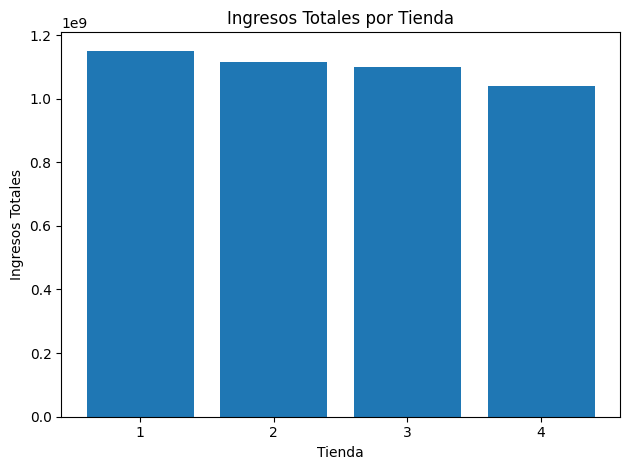

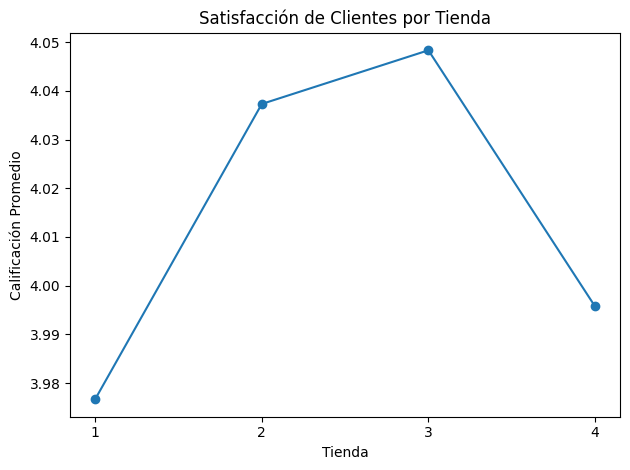

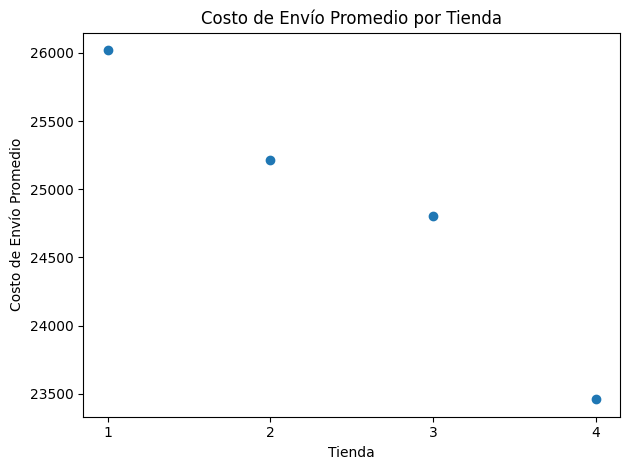

In [7]:
# Usar los DataFrames ya cargados
tiendas = [tienda, tienda2, tienda3, tienda4]

tiendas_ids = [1, 2, 3, 4]
ingresos        = [df['Precio'].sum() for df in tiendas]
promedios_cal   = [df['Calificación'].mean() for df in tiendas]
promedios_envio = [df['Costo de envío'].mean() for df in tiendas]

# 1) Barras: Ingresos Totales
plt.figure()
plt.bar(tiendas_ids, ingresos)
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda')
plt.xticks(tiendas_ids)
plt.tight_layout()
plt.show()

# 2) Línea: Calificación Promedio
plt.figure()
plt.plot(tiendas_ids, promedios_cal, marker='o')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Satisfacción de Clientes por Tienda')
plt.xticks(tiendas_ids)
plt.tight_layout()
plt.show()

# 3) Dispersión: Costo de Envío Promedio
plt.figure()
plt.scatter(tiendas_ids, promedios_envio)
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')
plt.xticks(tiendas_ids)
plt.tight_layout()
plt.show()